In [38]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets,linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.metrics import confusion_matrix,precision_score, accuracy_score, recall_score
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [39]:
data_frame = pd.read_csv("titanic.csv")
data_frame.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
data_frame.shape

(418, 12)

In [42]:
# Revisión de los tipos de datos
data_frame.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [43]:
# Valores nulos
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de PassengerId = 0
Total de valores nulos de Survived = 0
Total de valores nulos de Pclass = 0
Total de valores nulos de Name = 0
Total de valores nulos de Sex = 0
Total de valores nulos de Age = 86
Total de valores nulos de SibSp = 0
Total de valores nulos de Parch = 0
Total de valores nulos de Ticket = 0
Total de valores nulos de Fare = 1
Total de valores nulos de Cabin = 327
Total de valores nulos de Embarked = 0


In [44]:
data_frame['Age'].fillna(data_frame['Age'].mean(), inplace = True)
data_frame['Fare'].fillna(data_frame['Fare'].mean(), inplace = True)
#data_frame.fillna(0, inplace = True)

In [45]:
# Valores nulos
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de PassengerId = 0
Total de valores nulos de Survived = 0
Total de valores nulos de Pclass = 0
Total de valores nulos de Name = 0
Total de valores nulos de Sex = 0
Total de valores nulos de Age = 0
Total de valores nulos de SibSp = 0
Total de valores nulos de Parch = 0
Total de valores nulos de Ticket = 0
Total de valores nulos de Fare = 0
Total de valores nulos de Cabin = 327
Total de valores nulos de Embarked = 0


In [46]:
data_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [47]:
# Total de observaciones por survived
print(data_frame.groupby('Survived').size())

Survived
0    266
1    152
dtype: int64


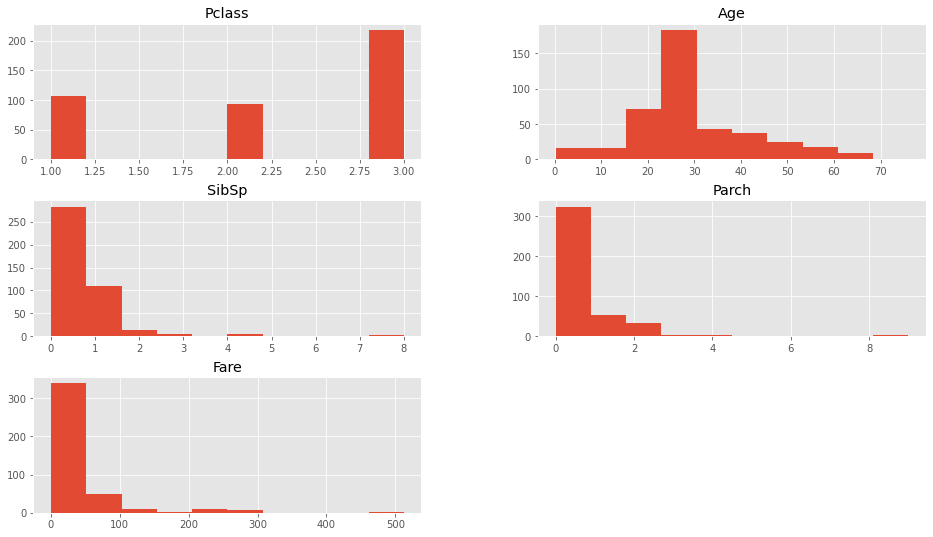

In [48]:
data_frame.drop(['Survived','PassengerId'],1).hist()
plt.show()

TRANSFORMACION VARIABLES CATEGORICAS

In [49]:
# Total de observaciones por género
print(data_frame.groupby('Sex').size())

Sex
female    152
male      266
dtype: int64


In [50]:
# Total de observaciones por cabina
print(data_frame.groupby('Cabin').size())

Cabin
A11      1
A18      1
A21      1
A29      1
A34      2
        ..
F G63    1
F2       1
F33      1
F4       2
G6       1
Length: 76, dtype: int64


In [51]:
# Total de observaciones por embarcacion
print(data_frame.groupby('Embarked').size())

Embarked
C    102
Q     46
S    270
dtype: int64


In [52]:
# transformaremos la columna categorica sexo en numerica 
d_genero = { 'female': 0, 'male': 1}
d_embarcacion = { 'C': 0, 'Q': 1, 'S': 2}
data_frame['SexNum'] = data_frame['Sex'].map(d_genero)
data_frame['EmarkedNum'] = data_frame['Embarked'].map(d_embarcacion)
data_frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexNum,EmarkedNum
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,0,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,1,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,1,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,2
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,1,2


AGRUPACION DE DATOS

In [53]:
X = data_frame.drop(['Survived','PassengerId','Name','Ticket','Sex','Embarked','Cabin','SexNum'],1)
X

,Pclass,Age,SibSp,Parch,Fare,EmarkedNum
0,3,34.50000,0,0,7.8292,1
1,3,47.00000,1,0,7.0000,2
2,2,62.00000,0,0,9.6875,1
3,3,27.00000,0,0,8.6625,2
4,3,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,2
414,1,39.00000,0,0,108.9000,0
415,3,38.50000,0,0,7.2500,2
416,3,30.27259,0,0,8.0500,2


In [54]:
y = data_frame[['Survived']]
y

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [56]:
X_train.shape

(334, 6)

In [57]:
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [58]:
#ENTRENAMOS EL MODELO
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

D:\ProgramasOP\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [59]:
y_pred = model.predict(X_test)

In [60]:
print('Score del modelo (train): %.2f' % model.score(X_train, y_train)) # Return the coefficient of determination  of the prediction.
print('Score del modelo (test): %.2f' % model.score(X_test, y_test))

Score del modelo (train): 0.66
Score del modelo (test): 0.67


In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6666666666666666


In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[53  5]
 [23  3]]


In [63]:
y_test.shape

(84, 1)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        58
           1       0.38      0.12      0.18        26

    accuracy                           0.67        84
   macro avg       0.54      0.51      0.48        84
weighted avg       0.60      0.67      0.60        84

